<h1>Linear Regression with Python Scikit Learn</h1>

# <h3>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
print("Data imported successfully")
df.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h5>let's see the statistical information regarding the given dataset</h5>

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# <h5> checking for the null values</h5>

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# <h5>Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:</h5>

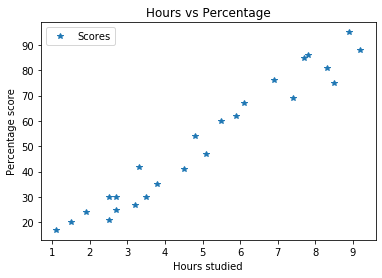

In [5]:
df.plot(x="Hours",y="Scores",style = '*')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

<h6>From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.</h6>

 <h2>Preparing the data</h2>

<h5>The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).</h5>

In [6]:
x = df.iloc[:,:-1].values
y= df.iloc[:,1].values

<h6>Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:</h6>

<h2>Training the Algorithm</h2>

<h6>We have split our data into training and testing sets, and now is finally the time to train our algorithm.</h6>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)

print("Training complete")

Training complete


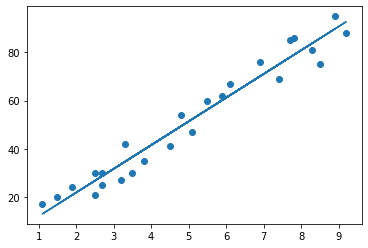

In [11]:
# plotting the regression line
line = lr.coef_*x+lr.intercept_

# plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# <h2>Making Predictions</h2>

<h6>Now that we have trained our algorithm, it's time to make some predictions.</h6>

In [12]:
print(x_test) # testing data- in hours
y_pred = lr.predict(x_test) # predicting the scores

[[5.1]
 [1.5]
 [5.9]
 [3.3]
 [3.2]]


In [13]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({"Actual":y_test , "Predicted": y_pred})
df2

,Actual,Predicted
0,47,52.333576
1,20,16.895780
2,62,60.208642
3,42,34.614678
4,27,33.630295


In [14]:
hours = [[9.25]]
pred = lr.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {pred}")

No of Hours = [[9.25]]
Predicted Score = [93.18548035]


# <h2>Evaluating the model</h2>

# <h6>The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.</h6>

In [15]:
from sklearn import metrics

In [16]:
mae = metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 4.848954268442984
